# Hopfield网络

Hopfield不同于BP网络，Hopfield网络具有反馈连接，即Hopfield应当属于递归神经网络。

Hopfield网络可由硬件实现。其可分为连续型和离散型两类，分别命名为CHNN(Continues Hopfield Neural Network)和DHNN(Discrete Hopfield Neural Network)。这里主要讨论的是离散型

## DHNN
离散型Hopfield网络是单层反馈网络，每一个节点的输出均会反馈至输入。

### 定义符号：

|符号|含义|
|:-:|:-:|
|$\bm{x(t)}$|t时刻的状态向量|
|$x_i$|第i个位置的状态值|
|$x_i^j$|第j个状态向量的i个位置的状态值|
|$\bm{W}$|连接权矩阵|
|$\bm{b}$|偏置|
|$f$|激活函数|
|$n$|状态维度|
|$k$|神经元数量|

考虑双极型离散数据，即状态只能是-1或1

### DHNN的基本概念
$$
\begin{equation}
            \bm{x(t+1)} = sign(\bm{W}x(t) + \bm{b})
\end{equation}
$$

对于Hopfield网络，首先需要指明初始状态$\bm{x(0)}$。然后按照上式进行反馈运行，网络最终达到某一种状态。对于状态有如下概念

1. **网络的稳定性**
若网络从初始状态开始，经过有限时间t后，网络的状态不再发生变化则称网络是稳定的
2. **网络的吸引子**
若网络达到稳定，则称稳定时的状态为网络的稳定吸引子；若网络状态有规律的在有限个状态之间振荡，则称网络处于有限环（limited circle）状态；若网络无规律的在某些状态之间振荡，则称网络处于混沌（chaos）状态
3. **吸引域**
对于某些特定的初始状态，网络按照一定的运行规则最后会稳定在同一个吸引子上。称能稳定在状态$x(t)$的所有初始状态集合为状态$x(t)$的吸引域

### 离散Hopfield网络的异步更新与全并行

* **异步更新**
对于异步更新方式，每一个时间步仅有某一个位置的状态更新，其余位置的状态不发生变化。对于这种更新方式有
$$
\begin{equation}
    x_i(t+1) = sign(\sum_{j=1}^n W_{ij} x_j(t) + b_i), i \in{1, 2, \cdots, n}
\end{equation}
$$

* **全并行工作方式**
全并行工作方式即式-1所示结果

### Hopfield网络的稳定性

* 能量函数
$$
\begin{equation}
    \begin{split}
        E 
        &= -\frac{1}{2}\sum_i\sum_j W_{ij}x_ix_j + \sum_i b_i x_i \\
        &= -\frac{1}{2}\bm{x}^T \bm{W} \bm{x} + \bm{b}^T \bm{x}
    \end{split}
\end{equation}
$$

* **定理1**
若Hopfield网络为离散形式，且其状态按照异步的方式进行更新。假设连接权矩阵对称且对角线元素全为0（无自反馈），则网络状态会在有限步内收敛到稳定点

    证明略（以后再补吧）

* **定理2**
若Hopfield网络为连续形式，连接权矩阵对称且负定，则对于状态的每次同步变化，能量函数单调下降

    证明略（以后再补吧）

### Hopfield网络解决的问题

#### 联想记忆
若将稳态视为一个记忆，则由初态向稳态收敛的过程就是寻找记忆的过程。在这种观点下，初态是给定的部分信息，收敛过程即为从部分信息找到全部信息的过程（恢复过程），例如从噪声中恢复原有信息。

#### 优化计算
若将稳态视为某一优化问题目标函数的极小点，则由初态向稳态收敛的过程就是优化计算过程。网络的稳定状态即为对应问题的解


**对比：**
|视角|连接权矩阵$\bm{W}$|稳定状态|
|--|--|--|--|
|联想记忆|待学习|给定|
|优化计算|给定|待求解|

### Hopfield网络的参数学习

#### **联想记忆的设计方法**

对于DHNN，给定m个模式样本，且样本的维度为p：

$$
\begin{equation}
    \begin{array}{cc}
        S = [S^1, S^2, \cdots, S^m] \\
        \bm{\bm{S^k}} = (\bm{S^k}_1, \bm{S^k}_2, \cdots, \bm{S^k}_p)^T, k\in\{1, 2, \cdots, m\}
    \end{array}
\end{equation}
$$

若满足$S_i \in \{ -1, 1\}$并且模式样本两两正交可得连接权矩阵为
$$
\begin{equation}
    \bm{W} = \sum_{k=1}^m \bm{S^k} (\bm{S^k})^T - diag(\bm{S^k})^2
\end{equation}
$$

由于状态的取值只可能是-1, 1，上式可化简为
$$
\begin{equation}
    \bm{W} = \sum_{k=1}^m \bm{S^k} (\bm{S^k})^T - mI
\end{equation}
$$
其中$I$为单位矩阵

**证明**
对于上述确定的连接权矩阵，模式样本正好是网络的吸引子

由于模式样本两两正交，并且状态的取值只可能是-1, 1，因此有：
$$
\begin{equation}
    (\bm{S^k})^T\bm{S^l} = 
    \left\{
        \begin{array}{cc}
        0&k\neq l \\
        ||\bm{S^k}||_2^2 = p &k=l
        \end{array}
    \right.
\end{equation}
$$

若初始状态为模式样本，则有:

$$
\begin{equation}
    x(0) = \bm{S^i}, i = 1, 2, \cdots, m
\end{equation}
$$

$$
\begin{equation}
    \begin{split}
        x(1) 
        &= sign(\bm{W}x(0)) \\
        &= sign(\sum_{k=1}^m (\bm{S^k} (\bm{S^k})^T - mI) \bm{S^i}), i = 1, 2, \cdots, m \\
        &= sign(\sum_{k=1}^m(\bm{S^k} (\bm{S^k})^T \bm{S^i} - mI \bm{S^i})), i = 1, 2, \cdots, m \\
        &= sign(\bm{S^i} (\bm{S^i})^T \bm{S^i} - \sum_{k=1}^m(\bm{S^i})), i = 1, 2, \cdots, m \\
        &= sign((p-m)\bm{S^i}), i = 1, 2, \cdots, m
    \end{split}
\end{equation}
$$
由于模式样本两两正交，而$n$维空间最多有$n$个线性无关向量，因此样本的维度$p$必大于等于模式样本数量$m$，否则模式样本两两正交不成立，由此可得
$$
\begin{equation}
    x(1) = sign((p-m)\bm{S^i}) = sign(\bm{S^i}) = \bm{S^i} = x(0), i = 1, 2, \cdots, m
\end{equation}
$$

模式样本为吸引子

证毕

**注意！！！**
**上述证明仅证明了使用这种方式得到的权重可使得模式样本为吸引子，但是并没有保证吸引子仅有$m$个模式样本，即可能出现非模式样本的吸引子。非模式样本的吸引子也被称为“伪吸引子”**

In [1]:
%matplotlib inline
import io
import os
import imageio
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random

In [2]:
# hopfield
class Hopfield(object):

    def __init__(self, state_dims):

        # 维度
        self.dims = state_dims

        # 定义权重
        self._weight = np.zeros((state_dims, state_dims))

        # 记忆的模式
        self.restore_patterns = list()

        # 最大迭代次数
        self.max_steps = self.dims
    
    def store_pattern(self, pattern):
        self.restore_patterns.append(np.array(pattern))
    
    def weight_update(self):
        assert len(self.restore_patterns) > 0
        self._weight += np.multiply(self.restore_patterns[-1], self.restore_patterns[-1].T) - np.eye(self.dims)

    def _update_once(self, state_tensor, update_index, asynchronous=False):
        if asynchronous:
            temp_result = np.sum(self._weight[update_index, :] * state_tensor)
            if temp_result >= 0:
                new_value = 1
            else:
                new_value = -1
            if new_value != state_tensor[update_index]:
                change_value = True
            else:
                change_value = False
            state_tensor[update_index] = new_value
        else:
            temp_result = np.matmul(self._weight, state_tensor) >= 0
            temp_result = temp_result*2 - 1

            if np.sum(temp_result-state_tensor) != 0:
                change_value = True
            else:
                change_value = False
            
            state_tensor = temp_result
        return state_tensor, change_value

    def pred(self, state_tensor, asynchronous=False):
        temp_state_tensor = state_tensor.copy()
        steps = 0
        change_count = 0
        update_trace = list()
        update_trace.append(temp_state_tensor)

        while True:
            state_tensor, whether_change = self._update_once(state_tensor, steps%self.dims, asynchronous)

            if whether_change:
                change_count = 0
            else:
                change_count += 1

            if change_count == self.dims-200 or steps == self.max_steps:
                break

            temp_state_tensor = state_tensor
            update_trace.append(temp_state_tensor.copy())

            steps += 1
        
        return state_tensor, update_trace

def create_gif(output_name, image_num):
        """
        生成gif
        """
        with imageio.get_writer("./images/{}.gif".format(output_name), mode="I", fps=20) as Writer:
            for ind in range(image_num):
                image = imageio.imread("./images/temp/{}.png".format(ind))
                os.remove("./images/temp/{}.png".format(ind))
                Writer.append_data(image)

状态[-1 -1]对应的吸引子为[-1 -1]
状态[-1  1]对应的吸引子为[1 1]
状态[ 1 -1]对应的吸引子为[-1 -1]
状态[1 1]对应的吸引子为[1 1]


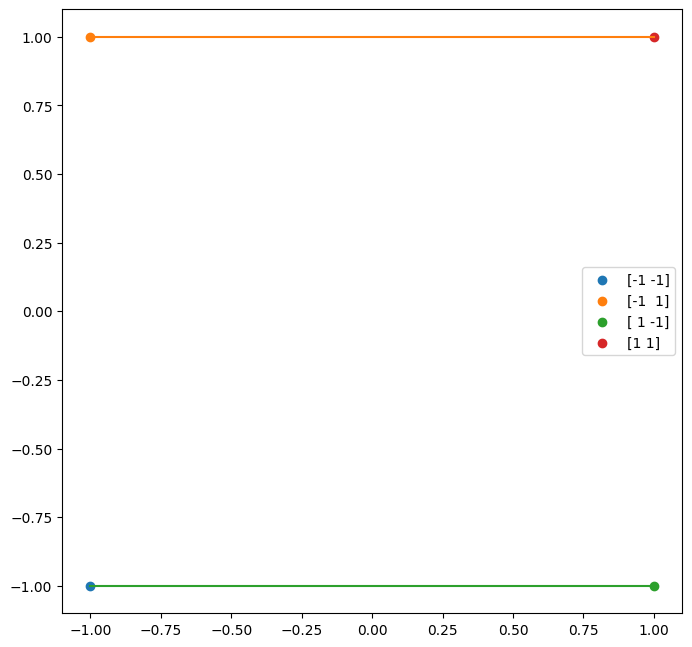

In [7]:
# 测试
# 假设为状态只有两维
# 两个待记忆状态(-1, -1)和(1, 1)
# 测试输入只有四种情况(-1, -1), (-1, 1), (1, -1), (1, 1)

np.random.seed(1024)
random.seed(1024)


# --------------------------- 数据和模型 ----------------------------
# 待记忆模式
pattern_1 = np.array([-1, -1])
pattern_2 = np.array([1, 1])
# 测试输入
test_num = 4
test_data = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
# 定义模型
MyHopfield = Hopfield(2)

# --------------------------- 绘图相关 ------------------------------
# 迭代轨迹
update_traces = list()
# 最长周期
max_update_steps = 0
colors_list = list(mpl.colors.cnames.keys())
color_index_list = np.random.randint(0, len(colors_list), test_num)

# --------------------------- 正式流程 ------------------------------
# 记忆模式
MyHopfield.store_pattern(pattern_1)
MyHopfield.weight_update()
MyHopfield.store_pattern(pattern_2)
MyHopfield.weight_update()

# 联想记忆
for i in range(test_num):
    result_state, temp_trace = MyHopfield.pred(test_data[i].copy(), asynchronous=True)
    update_traces.append(temp_trace)

    print("状态{}对应的吸引子为{}".format(test_data[i], result_state))

    if len(update_traces[-1]) > max_update_steps:
        max_update_steps = len(update_traces[-1])

# 绘制
plt.figure(figsize=(8, 8), dpi=100)
for i in range(test_num):
    x_list = np.array(update_traces[i])[:, 0]
    y_list = np.array(update_traces[i])[:, 1]

    plt.scatter([x_list[0]], [y_list[0]], label="{}".format(test_data[i]))
    plt.plot(x_list, y_list)
    plt.legend()

plt.show()

模式1


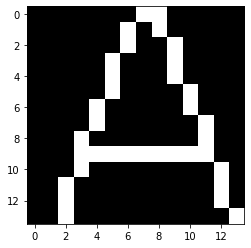

模式2


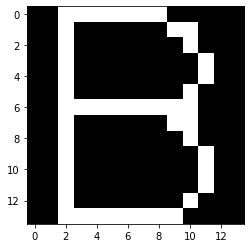

模式3


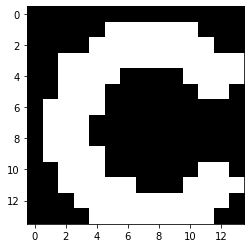

权重矩阵


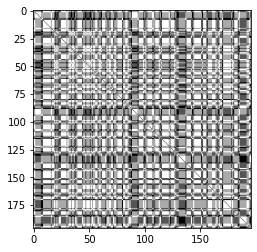

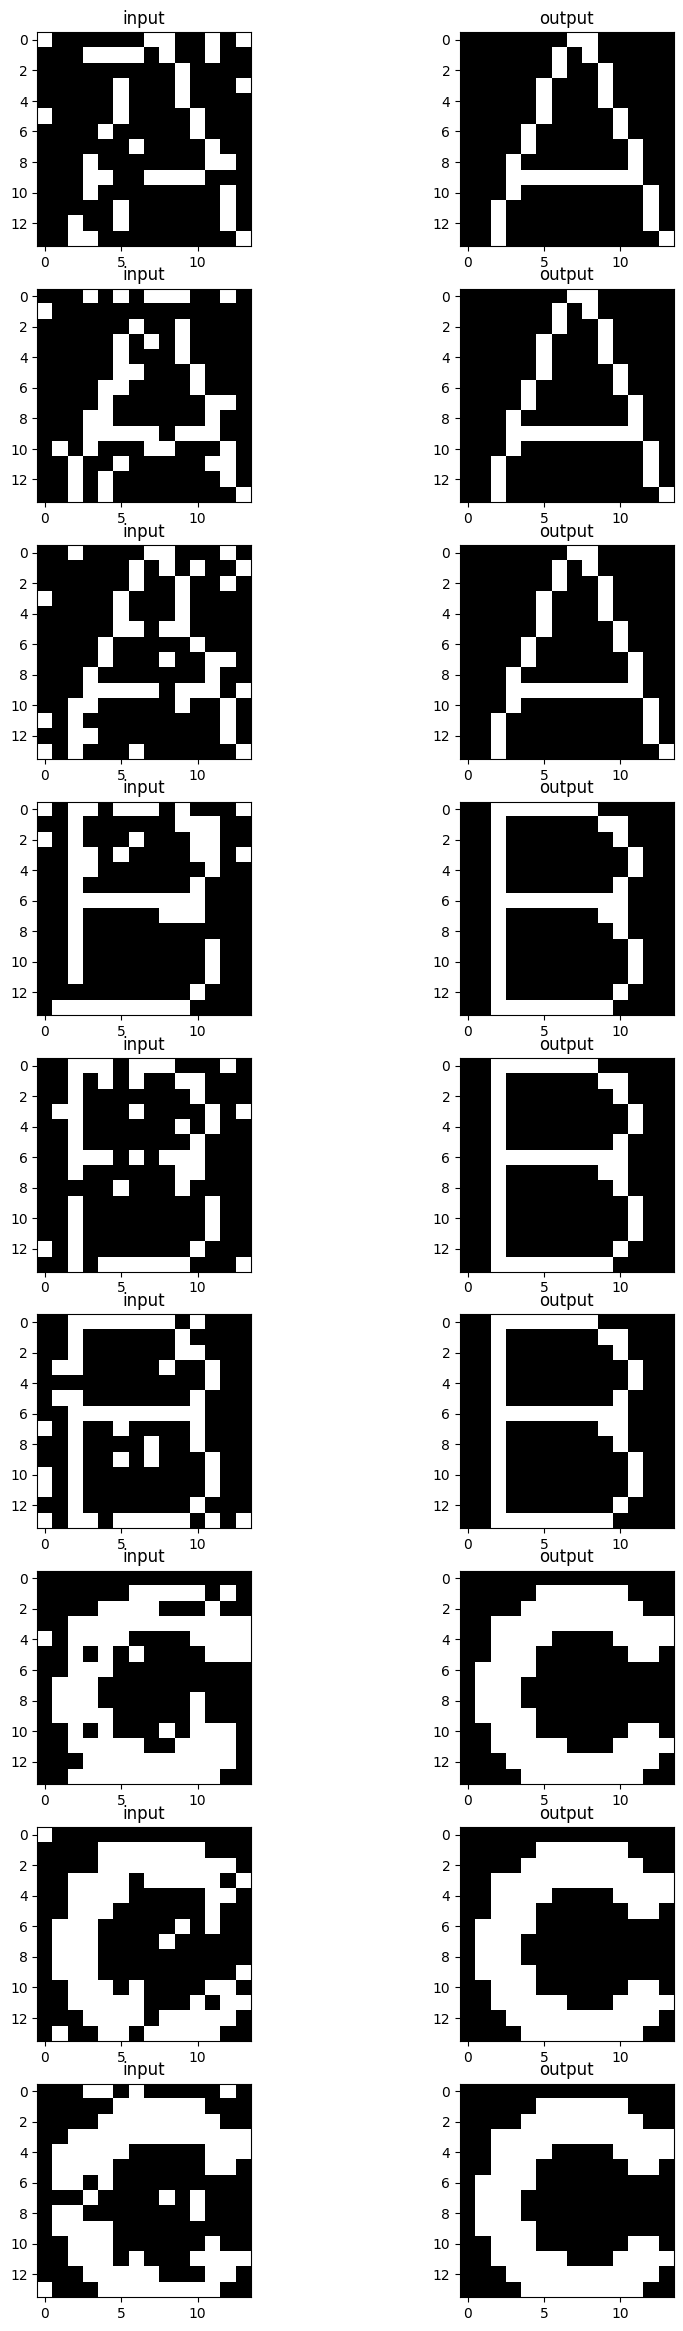

In [8]:
# 定义30*30的矩阵
# 记忆模式T、T_2
np.random.seed(1024)
random.seed(1024)

# --------------------------- 数据和模型 ----------------------------
# 待记忆模式
pattern_dims = 14

# 字母a
pattern_a = np.zeros((pattern_dims, pattern_dims, 1), dtype=np.uint8)
pattern_a = cv2.putText(pattern_a, "A", (0, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255), 1)
pattern_a = np.array(pattern_a/127.5 - 1, dtype=np.int32).reshape((pattern_dims, pattern_dims))

# 字母b
pattern_b = np.zeros((pattern_dims, pattern_dims, 1), dtype=np.uint8)
pattern_b = cv2.putText(pattern_b, "B", (0, 13), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255), 1)
pattern_b = np.array(pattern_b/127.5 - 1, dtype=np.int32).reshape((pattern_dims, pattern_dims))

# 字母c
pattern_c = np.zeros((pattern_dims, pattern_dims, 1), dtype=np.uint8)
pattern_c = cv2.putText(pattern_c, "c", (0, 13), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255), 2)
pattern_c = np.array(pattern_c/127.5 - 1, dtype=np.int32).reshape((pattern_dims, pattern_dims))


print("模式1")
plt.imshow(pattern_a, cmap="gray")
plt.show()
print("模式2")
plt.imshow(pattern_b, cmap="gray")
plt.show()
print("模式3")
plt.imshow(pattern_c, cmap="gray")
plt.show()

# 测试输入, 前三个由字母T随机生成，后三个由字母T_2随机生成
test_num = 9
# 随机取值的像素数量
noise_num = 20
# 测试数据
test_data = list()
for i in range(test_num):
    random_position_x = np.random.randint(0, pattern_dims, noise_num)
    random_position_y = np.random.randint(0, pattern_dims, noise_num)
    
    if i <= 2:
        temp_test_matrix = pattern_a.copy()
    elif i <= 5:
        temp_test_matrix = pattern_b.copy()
    else:
        temp_test_matrix = pattern_c.copy()

    temp_test_matrix[random_position_x, random_position_y] =  - temp_test_matrix[random_position_x, random_position_y]
    test_data.append(temp_test_matrix)

# 定义模型
MyHopfield = Hopfield(pattern_dims**2)

# --------------------------- 绘图相关 ------------------------------
# 迭代轨迹
update_traces = list()

# --------------------------- 正式流程 ------------------------------
# 记忆模式
MyHopfield.store_pattern(pattern_a.flatten().reshape(-1, 1))
MyHopfield.weight_update()
MyHopfield.store_pattern(pattern_b.flatten().reshape(-1, 1))
MyHopfield.weight_update()
MyHopfield.store_pattern(pattern_c.flatten().reshape(-1, 1))
MyHopfield.weight_update()

print("权重矩阵")
plt.imshow(MyHopfield._weight, cmap="gray")
plt.show()

# 联想记忆
plt.figure(figsize=(10, 30), dpi=100)
for i in range(test_num):
    result_state, temp_trace = MyHopfield.pred(test_data[i].copy().flatten().reshape(-1, 1))
    update_traces.append(temp_trace)

    # 绘图
    plt.subplot(test_num, 2, 1+i*2)
    plt.title("input")
    plt.imshow(test_data[i].reshape(pattern_dims, pattern_dims), cmap="gray")
    plt.subplot(test_num, 2, 2+i*2)
    plt.title("output")
    plt.imshow(result_state.reshape(pattern_dims, pattern_dims), cmap="gray")

plt.show()

# # ----------------------------- 生成动图 --------------------------
# for i in range(test_num):
#     trace_ = update_traces[i]
    
#     print("create gif of {}-th input".format(i))
#     with imageio.get_writer("./images/hopfield_{}.gif".format(i), mode="I", fps=20) as Writer:

#         for count, step_img in enumerate(trace_):
#             plt.cla()
#             plt.clf()
#             fig = plt.figure("", frameon=False)
#             plt.title("step: {}".format(count))
#             plt.imshow(step_img.reshape(pattern_dims, pattern_dims), cmap="gray")
#             canvas = fig.canvas

#             # 创建输出流对象
#             buffer = io.BytesIO()
#             # 打印到输出流
#             canvas.print_png(buffer)
#             # 使用Image转换缓存数据
#             img = Image.open(buffer)
#             # 生成对应的array
#             img = np.asarray(img)
#             # 销毁
#             buffer.close()
#             # 写入gif
#             Writer.append_data(img)